In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, '[5, 6, 100, 101] Hz sin waves sampled at 3000 Hz for 2.1 s')

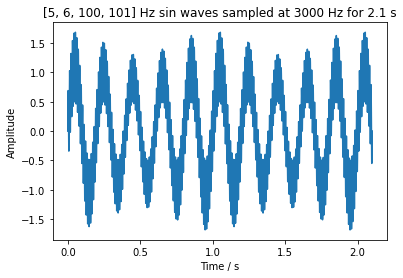

In [113]:
# Create a sine wave with multiple freq from 0 to 2 s

stopTime = 2.1
sampleFreq = 3000 # Hz
t = np.linspace(0, stopTime, int(stopTime * sampleFreq))
waveFreqs = [5,6,100,101]
waveAmps = [1,0.1,0.5,0.1]
wave = np.sum([A * np.sin(2*np.pi*f*t) for f, A in zip(waveFreqs, waveAmps)], axis=0)

plt.plot(t, wave)
plt.xlabel("Time / s")
plt.ylabel("Amplitude")
plt.title(f"{waveFreqs} Hz sin waves sampled at {sampleFreq} Hz for {stopTime} s")

In [119]:
# Choose a window function from Numpy
# bartlett, blackman, hamming, hanning, kaiser

window = "Bartlett"
window_f = np.bartlett(len(wave))
# Rectangular window:
# window_f = np.ones_like(wave)

# Plot window
# plt.plot(t, window_f)
# plt.xlabel("Time / s")
# plt.ylabel("Amplitude")
# plt.title(f"Normalised {window} Window Function")

Text(0, 0.5, 'Amplitude / dB')

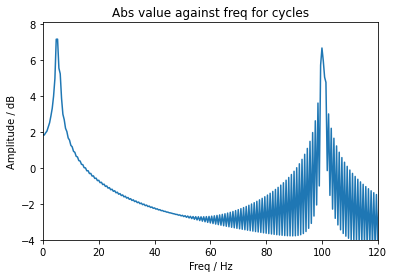

In [120]:
# DFT Analysis

sp = np.fft.fft(window_f*wave)
freqBins = np.fft.fftfreq(len(wave), 1/sampleFreq)

# Remove -ve freq
freqBins = freqBins[:len(freqBins)//2]
sp = sp[:len(sp)//2]

# Take the absolut value of sp
sp = np.absolute(sp)

plt.plot(freqBins, np.log(sp))
plt.xlim(0, 120)
plt.ylim(-4)
plt.title(f"Abs value against freq for cycles")
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")

Text(0, 0.5, 'Amplitude / dB')

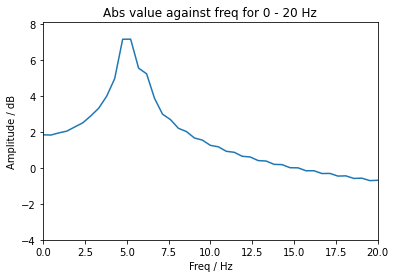

In [121]:
# Plot close to the first few freq
plt.plot(freqBins, np.log(sp))
plt.xlim(0, 20)
plt.ylim(-4)
plt.title(f"Abs value against freq for 0 - 20 Hz")
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")

Text(0, 0.5, 'Amplitude / dB')

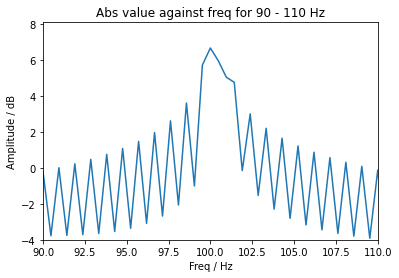

In [122]:
# Plot close to the first few freq
plt.plot(freqBins, np.log(sp))
plt.xlim(90, 110)
plt.ylim(-4)
plt.title(f"Abs value against freq for 90 - 110 Hz")
plt.xlabel("Freq / Hz")
plt.ylabel("Amplitude / dB")

In [118]:
# Print peaks close to known frequencies

print("Peaks at (Hz):")

for f in waveFreqs:
    # Find elements +/- 1 Hz either side of f
    f_min = f - 0.5
    f_max = f + 0.5
    f_min_idx = np.argmin(np.abs(freqBins - f_min))
    f_max_idx = np.argmin(np.abs(freqBins - f_max))

    # Find peak between these idx
    peak_idx = np.argmax(sp[f_min_idx: f_max_idx])
    print(freqBins[f_min_idx + peak_idx])

Peaks at (Hz):
4.761904761904762
6.19047619047619
100.0
100.95238095238095


In [87]:
np.argmin(np.abs(freqBins-5))

10

In [37]:
sp[10]

161.76460927901195